In [2]:
#Import libraries here
import inspect
import time
from pprint import PrettyPrinter

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
path = r"C:\Users\hp\Research-Try-ML\Models\SST-Antalya-2007-2023-Cleaned.csv"
df = pd.read_csv(path)
df.set_index('Date', inplace=True)

#Change Datetime Datatype to Datetime
df.index = pd.to_datetime(df.index)
df.head()

,SST
Date,
2007-01-01,17.9
2007-01-02,17.9
2007-01-03,17.7
2007-01-04,17.5
2007-01-05,17.4


In [4]:
df["SST-365"] = df["SST"].shift(365)

#drop the null value (1st one)
df.dropna(inplace=True)
df.head()

,SST,SST-365
Date,,
2008-01-01,18.5,17.9
2008-01-02,18.3,17.9
2008-01-03,18.7,17.7
2008-01-04,19.1,17.5
2008-01-05,18.8,17.4


In [5]:
df

,SST,SST-365
Date,,
2008-01-01,18.5,17.9
2008-01-02,18.3,17.9
2008-01-03,18.7,17.7
2008-01-04,19.1,17.5
2008-01-05,18.8,17.4
...,...,...
2023-12-27,21.0,20.1
2023-12-28,20.8,19.8
2023-12-29,20.8,19.7


In [6]:
df.corr()

,SST,SST-365
SST,1.000000,0.978274
SST-365,0.978274,1.000000


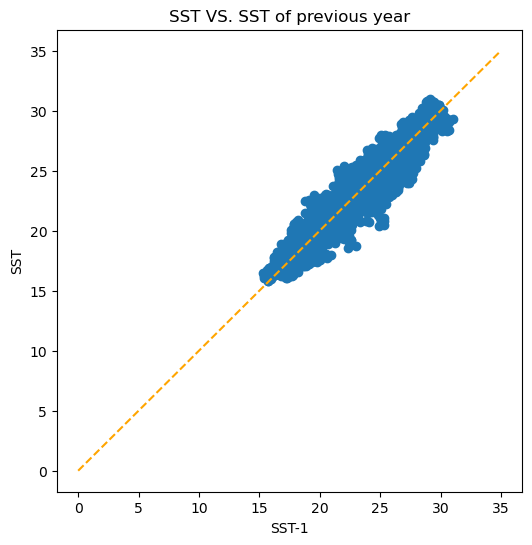

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(x=df["SST-365"], y=df["SST"])
ax.plot([0, 35], [0, 35], linestyle= "--", color="orange")
plt.xlabel("SST-1")
plt.ylabel("SST")
plt.title("SST VS. SST of previous year");

In [7]:
target = "SST"
y = df[target]
X = df.drop(columns=target)

In [8]:
cutoff = int(len(X) * 0.80)

X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

In [9]:
model = LinearRegression()  

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [11]:
training_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, model.predict(X_test))
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training MAE: 0.69
Test MAE: 0.77


In [12]:
intercept = model.intercept_.round(2)
coefficient = model.coef_.round(2)[0]

print(f"P2 = {intercept} + ({coefficient} * SST-365)")

P2 = 0.55 + (0.98 * SST-365)


In [13]:
df_pred_test = pd.DataFrame(
    {
        "y_test": y_test,
        "y_pred": model.predict(X_test)
    }
)
df_pred_test.head()

,y_test,y_pred
Date,,
2020-10-19,26.0,25.595238
2020-10-20,26.3,25.399564
2020-10-21,26.1,25.399564
2020-10-22,26.2,25.399564
2020-10-23,26.2,25.106054


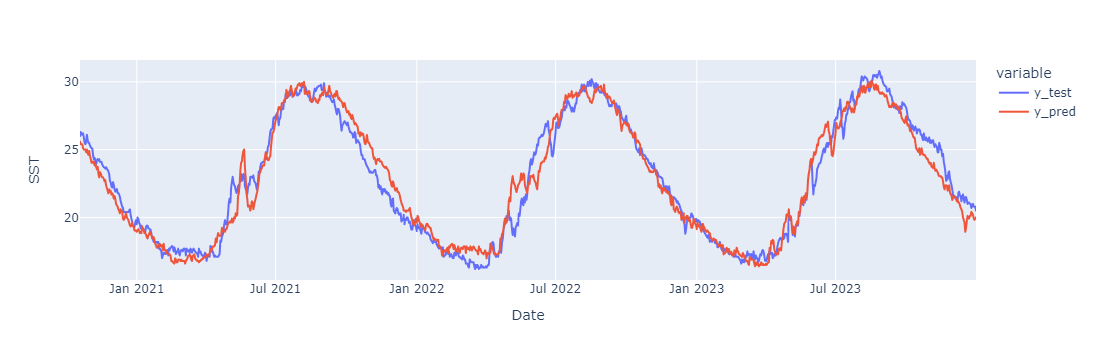

In [16]:
fig = px.line(df_pred_test, labels={"value":"SST"})
fig.show()

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np



# Calculate metrics
test_mae = mean_absolute_error(y_test, model.predict(X_test))

test_mse = mean_squared_error(y_test, model.predict(X_test))
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, model.predict(X_test))

# Print metrics
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Root Mean Squared Error (RMSE): {test_rmse}')
print(f'R-squared (R²): {test_r2}')

Mean Absolute Error (MAE): 0.7728790986338885
Mean Squared Error (MSE): 1.0086284573434754
Root Mean Squared Error (RMSE): 1.0043049623214433
R-squared (R²): 0.9470676817450973


# Forecast 2024

In [23]:
# Forecasting for 2024
last_365_values = df["SST-365"].iloc[-365:].values.reshape(-1, 1)
forecast_2024 = model.predict(last_365_values)

# Creating a DataFrame for the forecasted values
dates_2024 = pd.date_range(start="2024-01-01", periods=365)
df_forecast_2024 = pd.DataFrame({
    "Date": dates_2024,
    "Forecasted_SST": forecast_2024
})

df_forecast_2024

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



,Date,Forecasted_SST
0,2024-01-01,19.138005
1,2024-01-02,19.627190
2,2024-01-03,19.333679
3,2024-01-04,19.431516
4,2024-01-05,19.333679
...,...,...
360,2024-12-26,20.214211
361,2024-12-27,19.920700
362,2024-12-28,19.822863
363,2024-12-29,19.920700


# Save results

In [17]:
df

,SST,SST-365
Date,,
2008-01-01,18.5,17.9
2008-01-02,18.3,17.9
2008-01-03,18.7,17.7
2008-01-04,19.1,17.5
2008-01-05,18.8,17.4
...,...,...
2023-12-27,21.0,20.1
2023-12-28,20.8,19.8
2023-12-29,20.8,19.7


In [18]:
df_pred_test

,y_test,y_pred
Date,,
2020-10-19,26.0,25.595238
2020-10-20,26.3,25.399564
2020-10-21,26.1,25.399564
2020-10-22,26.2,25.399564
2020-10-23,26.2,25.106054
...,...,...
2023-12-27,21.0,20.214211
2023-12-28,20.8,19.920700
2023-12-29,20.8,19.822863


In [24]:
df_forecast_2024

,Date,Forecasted_SST
0,2024-01-01,19.138005
1,2024-01-02,19.627190
2,2024-01-03,19.333679
3,2024-01-04,19.431516
4,2024-01-05,19.333679
...,...,...
360,2024-12-26,20.214211
361,2024-12-27,19.920700
362,2024-12-28,19.822863
363,2024-12-29,19.920700


In [29]:
import pandas as pd

# Assuming your dataframes are named as follows:
# df_sst for the SST data
# df_pred_test for the prediction test data
# df_forecast_2024 for the forecast data

# Merge the dataframes on the 'Date' column
df_merged = pd.merge(df, df_pred_test, on='Date', how='outer')
df_merged = pd.merge(df_merged, df_forecast_2024, on='Date', how='outer')

# Ensure each row has a unique date and sort by date
df_merged = df_merged.sort_values(by='Date').reset_index(drop=True)

# Display the first few rows of the merged dataframe
df_merged

,Date,SST,SST-365,y_test,y_pred,Forecasted_SST
0,2008-01-01,18.5,17.9,NaN,NaN,NaN
1,2008-01-02,18.3,17.9,NaN,NaN,NaN
2,2008-01-03,18.7,17.7,NaN,NaN,NaN
3,2008-01-04,19.1,17.5,NaN,NaN,NaN
4,2008-01-05,18.8,17.4,NaN,NaN,NaN
...,...,...,...,...,...,...
6204,2024-12-26,NaN,NaN,NaN,NaN,20.214211
6205,2024-12-27,NaN,NaN,NaN,NaN,19.920700
6206,2024-12-28,NaN,NaN,NaN,NaN,19.822863
6207,2024-12-29,NaN,NaN,NaN,NaN,19.920700


In [31]:
df_merged.to_excel(r"C:\Users\hp\Research-Try-ML\Models\Basic-Model\Antalya-results\LinearRegression-Antalya.xlsx", index=False)